In [2]:
#Read dataframes
import pandas as pd
df_airlines = pd.read_csv('/Users/hannapedersen/Documents/NOVA/T3/Advanced Programming/Assignment/flight_data/airlines.csv')
df_airplanes = pd.read_csv('/Users/hannapedersen/Documents/NOVA/T3/Advanced Programming/Assignment/flight_data/airplanes.csv', on_bad_lines='skip')
df_airports = pd.read_csv('/Users/hannapedersen/Documents/NOVA/T3/Advanced Programming/Assignment/flight_data/airports.csv', on_bad_lines='skip')
df_routes =  pd.read_csv('/Users/hannapedersen/Documents/NOVA/T3/Advanced Programming/Assignment/flight_data/routes.csv', on_bad_lines='skip')


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

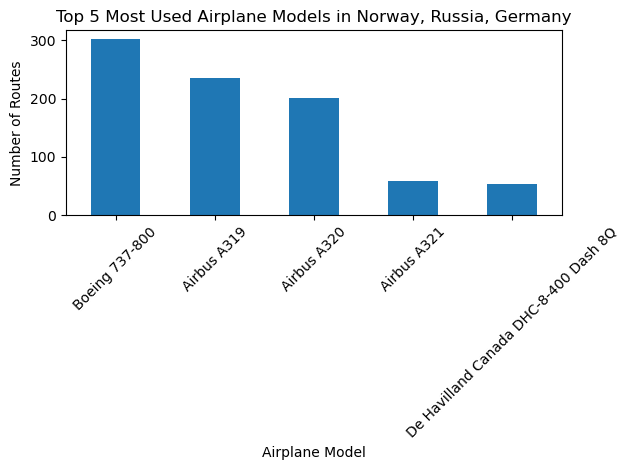

In [34]:
def airplane_models(df_routes, df_airports, df_airplanes, countries = None, N =10):
    
    # Ensure IDs are of the same type for successful merging
    df_routes['Source airport ID'] = df_routes['Source airport ID'].astype(str)
    df_airports['Airport ID'] = df_airports['Airport ID'].astype(str)
   
   # Merge routes with airports to get the country of each route
    df_routes_with_country = pd.merge(df_routes, df_airports[['Airport ID', 'Country']], left_on='Source airport ID', right_on='Airport ID', how='left')
    
    # Merge the result with airplanes to get the model names (on equipment)
    df_final_merged = pd.merge(df_routes_with_country, df_airplanes[['IATA code', 'Name']], left_on='Equipment', right_on='IATA code', how='left')

    # Filter by countries if specified
    if countries:
        if isinstance(countries, str):
            countries = [countries]
        df_final_merged = df_final_merged[df_final_merged['Country'].isin(countries)]

    # Count occurrences of each airplane model
    model_counts = df_final_merged['Name'].value_counts().head(N)
    model_counts.plot(kind='bar')
    plt.title(f'Top {N} Most Used Airplane Models' + (' Worldwide' if not countries else ' in ' + ', '.join(countries)))
    plt.xlabel('Airplane Model')
    plt.ylabel('Number of Routes')
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

airplane_models(df_routes, df_airports, df_airplanes, countries=['Norway, Russia', 'Germany'], N=5)  # For Germany




